## Projeto de Ciências de Dados com a desde a Analise

# BIBLIOTECAS

import pandas as pd
import pathlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.notebook import tqdm
import plotly.express as px

from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.model_selection import train_test_split

# Exportação dataset

In [2]:
meses = {'jan': 1, 'fev' : 2, 'mar' : 3, 'abr' : 4, 'mai' : 5, 'jun' : 6, 'jul' : 7, 'ago' : 8, 'set' : 9, 'out' : 10, 'nov' : 11, 'dez' : 12}

 
caminho_bases = pathlib.Path('dataset')

bases = []

#pbar = tqdm(total=len(bases['caminho_bases']),position=0,leave=True)
for arquivo in tqdm(caminho_bases.iterdir())  :
    #pbar.update()
    mes = meses[arquivo.name[:3]]
    ano = arquivo.name[-8]
    ano = int(ano.replace('csv', ''))
    df = pd.read_csv(caminho_bases / arquivo.name)
    
    df['mes'] = mes
    df['ano'] = ano
    
    bases.append(df)
    

base_airbnb_df = pd.concat(bases)    
display(base_airbnb_df)  

0it [00:00, ?it/s]

C:\Users\igor.de.paula\AppData\Local\Temp\ipykernel_7772\856755075.py:14: DtypeWarning: Columns (62,87) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(caminho_bases / arquivo.name)
C:\Users\igor.de.paula\AppData\Local\Temp\ipykernel_7772\856755075.py:14: DtypeWarning: Columns (61,62,94) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(caminho_bases / arquivo.name)
C:\Users\igor.de.paula\AppData\Local\Temp\ipykernel_7772\856755075.py:14: DtypeWarning: Columns (61,62,94) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(caminho_bases / arquivo.name)
C:\Users\igor.de.paula\AppData\Local\Temp\ipykernel_7772\856755075.py:14: DtypeWarning: Columns (87) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(caminho_bases / arquivo.name)
C:\Users\igor.de.paula\AppData\Local\Temp\ipykernel_7772\856755075.py:14: DtypeWarning: C

id                            listing_url       scrape_id  \
0         14063     https://www.airbnb.com/rooms/14063  20180414160018   
1         17878     https://www.airbnb.com/rooms/17878  20180414160018   
2         24480     https://www.airbnb.com/rooms/24480  20180414160018   
3         25026     https://www.airbnb.com/rooms/25026  20180414160018   
4         31560     https://www.airbnb.com/rooms/31560  20180414160018   
...         ...                                    ...             ...   
34324  38844730  https://www.airbnb.com/rooms/38844730  20190923212307   
34325  38846408  https://www.airbnb.com/rooms/38846408  20190923212307   
34326  38846703  https://www.airbnb.com/rooms/38846703  20190923212307   
34327  38847050  https://www.airbnb.com/rooms/38847050  20190923212307   
34328  38847655  https://www.airbnb.com/rooms/38847655  20190923212307   

      last_scraped                                          name  \
0       2018-04-14                          Living in a Postcard   
1       2018-04-14             Very Nice 2Br - Copacabana - WiFi   
2       2018-04-14              Nice and cozy near Ipanema Beach   
3       2018-04-14     Beautiful Modern Decorated Studio in Copa   
4       2018-04-14              NICE & COZY 1BDR - IPANEMA BEACH   
...            ...                                           ...   
34324   2019-09-24             TRANSAMERICA BARRA DA TIJUCA R IV   
34325   2019-09-24                      Alugo para o Rock in Rio   
34326   2019-09-24  Apt COMPLETO em COPACABANA c/TOTAL SEGURANÇA   
34327   2019-09-24                     Cobertura Cinematografica   
34328   2019-09-24     Quarto em cobertura em frente à praia III   

                                                 summary  \
0      Besides the most iconic's view, our apartment ...   
1      Please note that special rates apply for New Y...   
2      My studio is located in the best  of Ipanema. ...   
3      Our apartment is a little gem, everyone loves ...   
4      This nice and clean 1 bedroom apartment is loc...   
...                                                  ...   
34324  Em estilo contemporâneo, o Transamerica Prime ...   
34325  Confortável apartamento, 2 quartos , sendo 1 s...   
34326  Apartamento quarto e sala COMPLETO para curtas...   
34327                               Cobertura alto nivel   
34328  Quarto em cobertura quadriplex com vista lindí...   

                                                   space  \
0                                                    NaN   
1      - large balcony which looks out on pedestrian ...   
2      The studio is located at Vinicius de Moraes St...   
3      This newly renovated studio (last renovations ...   
4      This nice and clean 1 bedroom apartment is loc...   
...                                                  ...   
34324                                                NaN   
34325  O apartamento estará com mobília completa disp...   
34326  Espaço ideal para até 5 pessoas. Cama de casal...   
34327                                                NaN   
34328                                                NaN   

                                             description experiences_offered  \
0      Besides the most iconic's view, our apartment ...                none   
1      Please note that special rates apply for New Y...                none   
2      My studio is located in the best  of Ipanema. ...                none   
3      Our apartment is a little gem, everyone loves ...                none   
4      This nice and clean 1 bedroom apartment is loc...                none   
...                                                  ...                 ...   
34324  Em estilo contemporâneo, o Transamerica Prime ...                none   
34325  Confortável apartamento, 2 quartos , sendo 1 s...                none   
34326  Apartamento quarto e sala COMPLETO para curtas...                none   
34327                               Cobertura alto nivel         

# Identificar quais colunas contêm informações relevantes para a análise.

In [ ]:
colunas = ['host_response_time', 'host_response_rate', 'host_is_superhost', 'host_listings_count', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'price', 'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people', 'minimum_nights', 'maximum_nights', 'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'instant_bookable', 'is_business_travel_ready', 'cancellation_policy', 'ano', 'mes']
base_airbnb_df = base_airbnb_df.loc[:, colunas]

display(base_airbnb_df)

In [4]:
for coluna in tqdm(base_airbnb_df):
    if base_airbnb_df[coluna].isnull().sum() > 300000:
        base_airbnb_df = base_airbnb_df.drop(coluna, axis=1)


base_airbnb_df = base_airbnb_df.dropna()
        

print(base_airbnb_df.isnull().sum())
print(base_airbnb_df.shape)

  0%|          | 0/902210 [00:00<?, ?it/s]

host_is_superhost           0
host_listings_count         0
latitude                    0
longitude                   0
property_type               0
room_type                   0
accommodates                0
bathrooms                   0
bedrooms                    0
beds                        0
bed_type                    0
amenities                   0
price                       0
guests_included             0
extra_people                0
minimum_nights              0
maximum_nights              0
number_of_reviews           0
instant_bookable            0
is_business_travel_ready    0
cancellation_policy         0
ano                         0
mes                         0
dtype: int64
(897709, 23)


In [5]:
print(base_airbnb_df.dtypes)
print('-'*60)
print(base_airbnb_df.iloc[0])

host_is_superhost            object
host_listings_count         float64
latitude                    float64
longitude                   float64
property_type                object
room_type                    object
accommodates                  int64
bathrooms                   float64
bedrooms                    float64
beds                        float64
bed_type                     object
amenities                    object
price                        object
guests_included               int64
extra_people                 object
minimum_nights                int64
maximum_nights                int64
number_of_reviews             int64
instant_bookable             object
is_business_travel_ready     object
cancellation_policy          object
ano                           int64
mes                           int64
dtype: object
------------------------------------------------------------
host_is_superhost                                                           f
host_listings_count

## Neste passo, realizamos a substituição de valores em colunas específicas utilizando str.replace para padronizar ou corrigir textos, e convertemos o tipo de dados com astype para garantir que as colunas estejam no formato adequado para análise, facilitando a interpretação e processamento subsequente

In [6]:
base_airbnb_df['price'] = base_airbnb_df['price'].str.replace('$','')
base_airbnb_df['price'] = base_airbnb_df['price'].str.replace(',','')
base_airbnb_df['price'] = base_airbnb_df['price'].astype(np.float32, copy=False)

base_airbnb_df['extra_people'] = base_airbnb_df['extra_people'].str.replace('$','')
base_airbnb_df['extra_people'] = base_airbnb_df['extra_people'].str.replace(',','')
base_airbnb_df['extra_people'] = base_airbnb_df['extra_people'].astype(np.float32, copy=False)


print(base_airbnb_df.dtypes)


host_is_superhost            object
host_listings_count         float64
latitude                    float64
longitude                   float64
property_type                object
room_type                    object
accommodates                  int64
bathrooms                   float64
bedrooms                    float64
beds                        float64
bed_type                     object
amenities                    object
price                       float32
guests_included               int64
extra_people                float32
minimum_nights                int64
maximum_nights                int64
number_of_reviews             int64
instant_bookable             object
is_business_travel_ready     object
cancellation_policy          object
ano                           int64
mes                           int64
dtype: object


## Heatmap revela correlações entre colunas

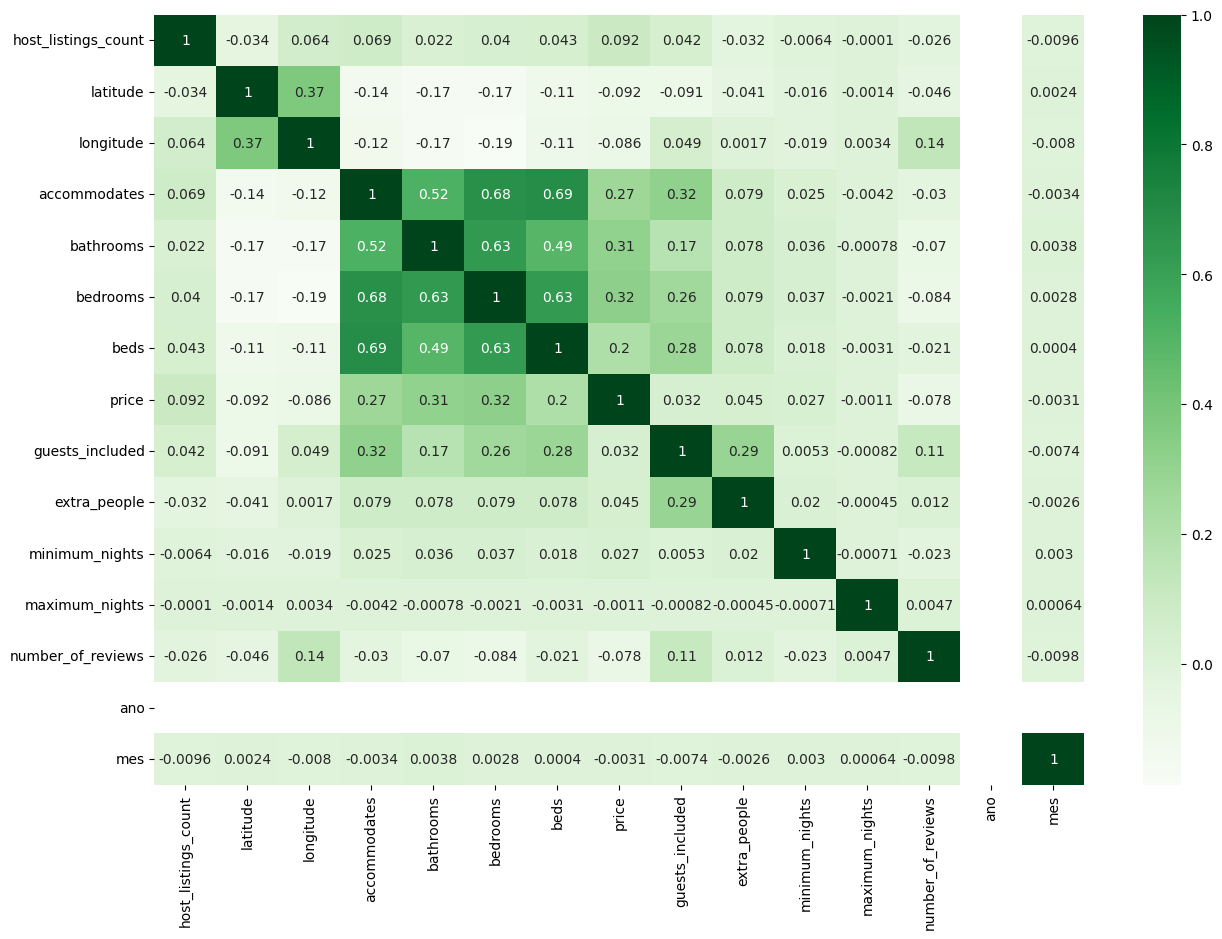

In [7]:
#print(base_airbnb_df.corr(numeric_only=True))

plt.figure(figsize=(15,10));
sns.heatmap(base_airbnb_df.corr(numeric_only=True), annot=True, cmap='Greens');

# Removemos outliers via quantis para evitar distorções e melhorar a precisão das previsões

In [8]:
def limites(coluna):
    q1 = coluna.quantile(0.25)
    q3 = coluna.quantile(0.75)
    amplitude = q3 - q1
    return q1 - 1.5 * amplitude, q3 + 1.5 * amplitude
def excluir_outliers(df,nome_coluna):
    qtde_linhas = df.shape[0]
    lim_inf, lim_sup = limites(df[nome_coluna])
    df = df.loc[(df[nome_coluna] >= lim_inf) & (df[nome_coluna] <= lim_sup),:]
    linhas_removidas = qtde_linhas - df.shape[0]
    return df, linhas_removidas

In [9]:



def diagrama_caixa(coluna):    
    fig,(ax1,ax2) = plt.subplots(1,2,)
    fig.set_size_inches(15,5)
    sns.boxplot(x=coluna, ax=ax1,)
    ax2.set_xlim(limites(coluna))
    sns.boxplot(x=coluna, ax=ax2)
    
def histograma(coluna):
    plt.figure(figsize=(15,5))
    sns.histplot(coluna, kde=True,)
def grafico_barra(coluna):
    plt.figure(figsize=(15,5))
    ax = sns.barplot(x=coluna.value_counts().index, y=coluna.value_counts())
    #sns.color_palette("Spectral", as_cmap=True)
    ax.set_xlim(limites(coluna))

# Price

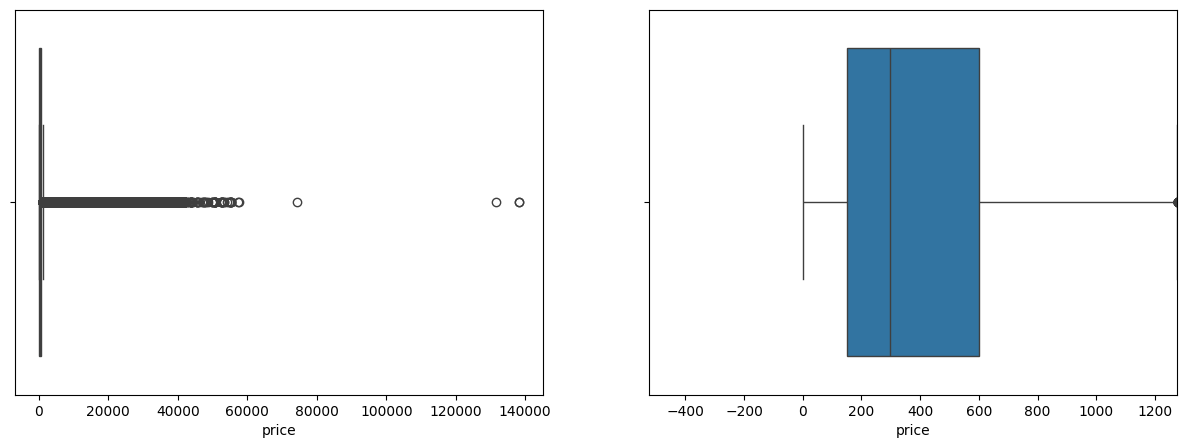

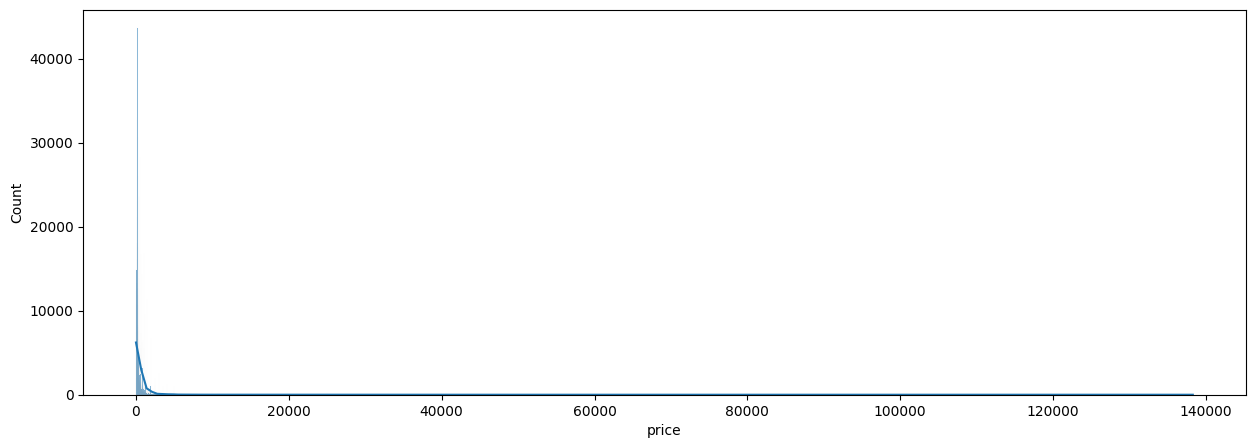

In [10]:
diagrama_caixa(base_airbnb_df['price'])
histograma(base_airbnb_df['price'])

In [11]:
base_airbnb_df, linhas_removidas = excluir_outliers(base_airbnb_df,'price')
print('{} linhas removidas'.format(linhas_removidas))

87282 linhas removidas


(810427, 23)


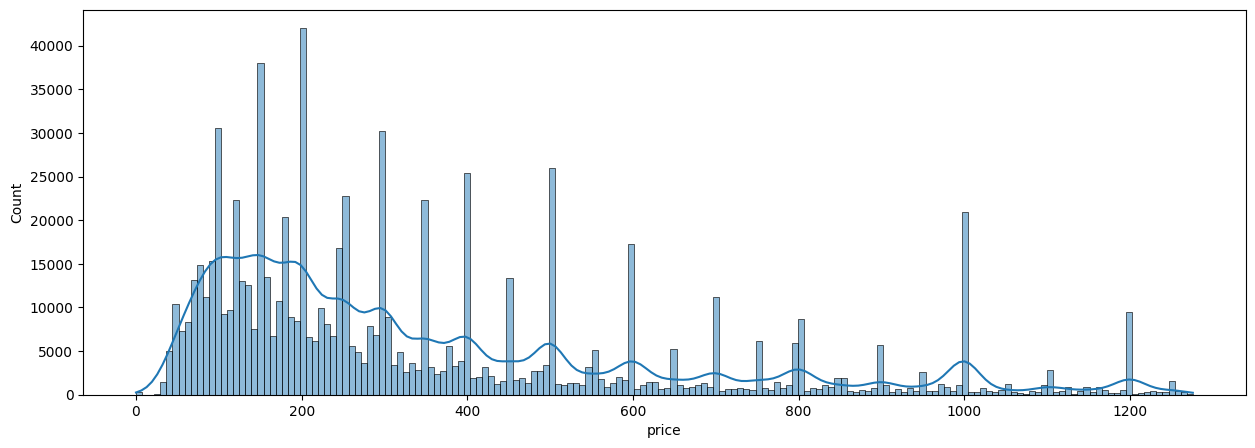

In [12]:
histograma(base_airbnb_df['price'])
print(base_airbnb_df.shape)

#### Extra People

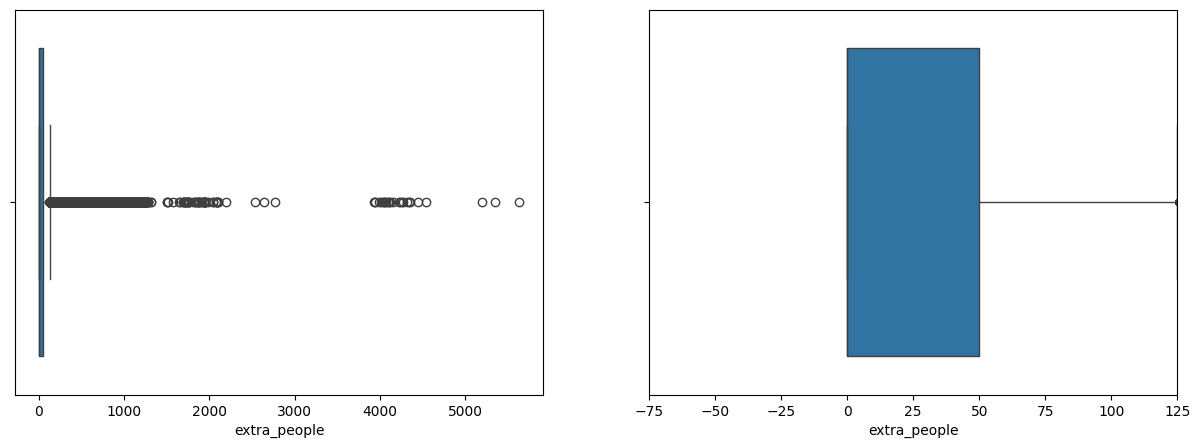

In [13]:
diagrama_caixa(base_airbnb_df['extra_people'])
#histograma(base_airbnb_df['extra_people'])

In [14]:
base_airbnb_df, linhas_removidas = excluir_outliers(base_airbnb_df,'extra_people')
print('{} linhas removidas'.format(linhas_removidas))

59194 linhas removidas


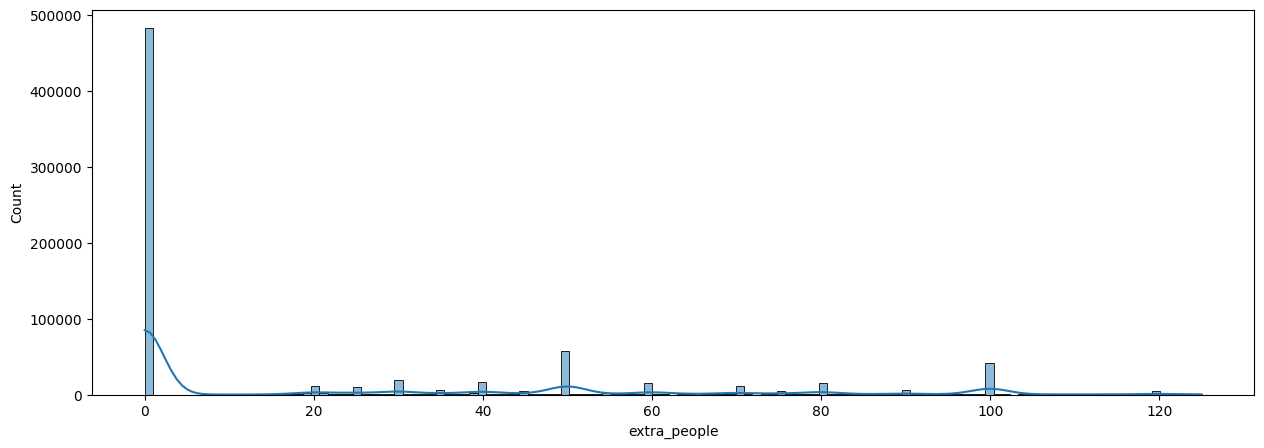

In [15]:
histograma(base_airbnb_df['extra_people'])

## host_listings_count

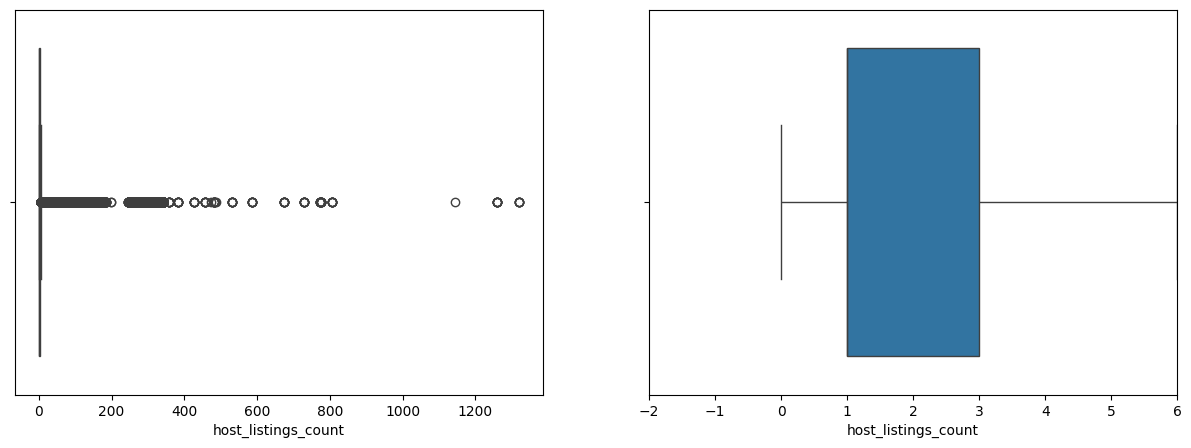

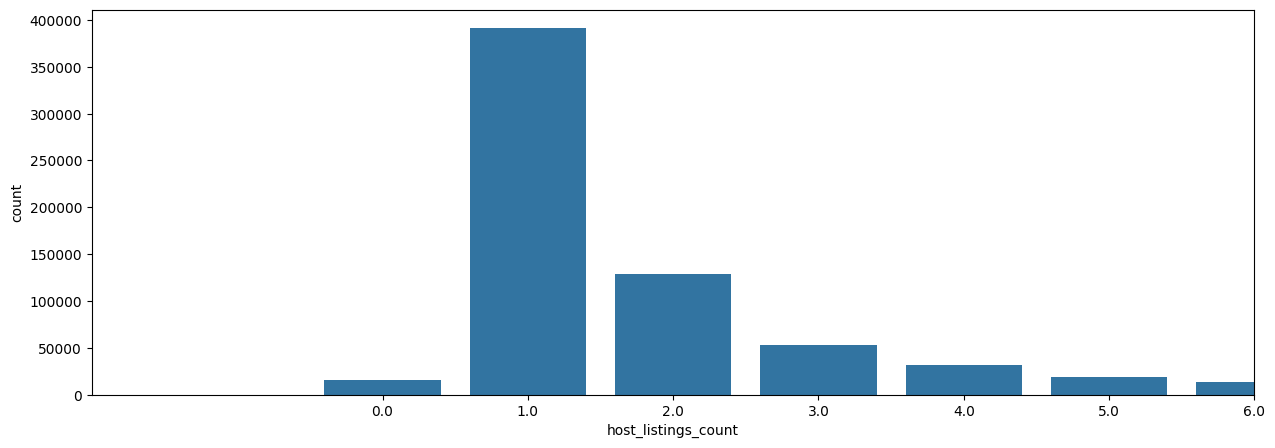

In [16]:
diagrama_caixa(base_airbnb_df['host_listings_count'])
grafico_barra(base_airbnb_df['host_listings_count'])

# Accomodates

18552 linhas removidas


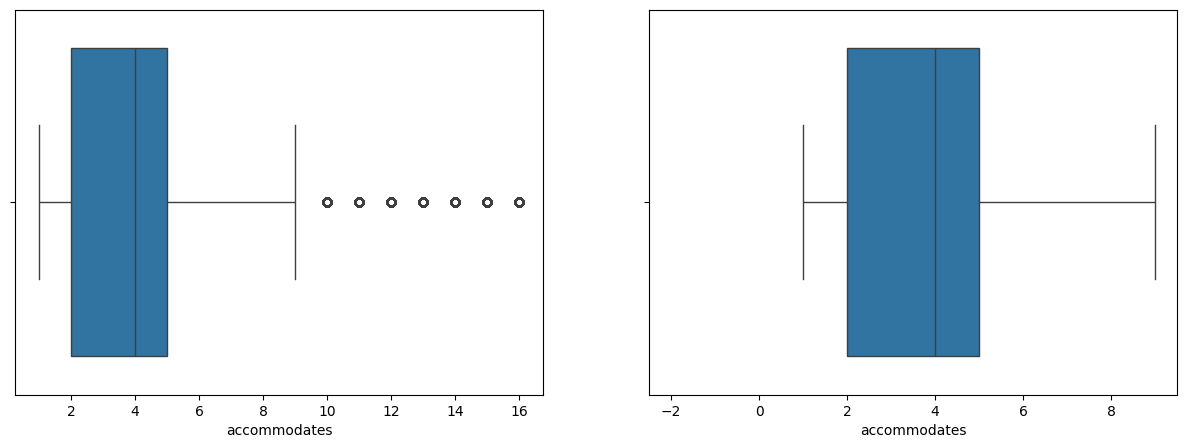

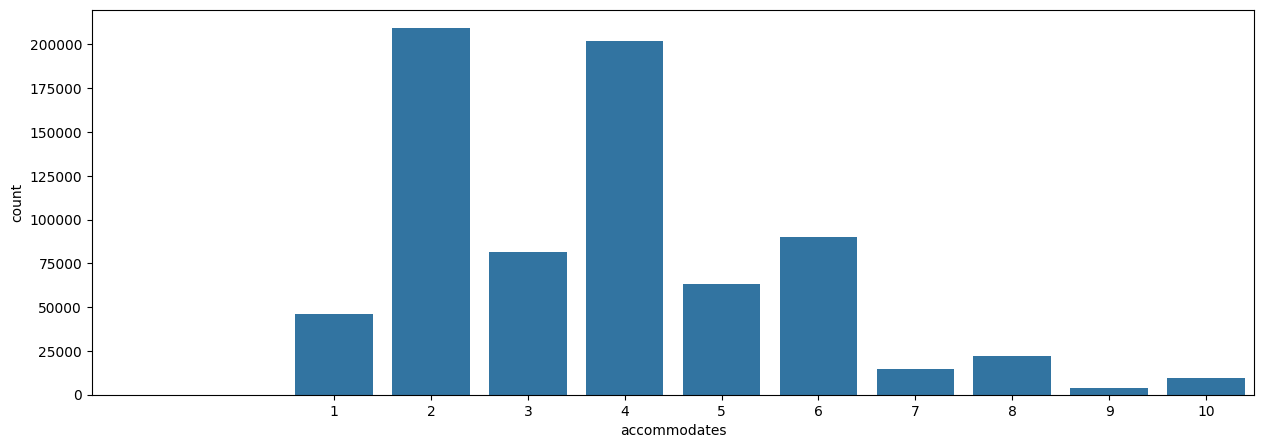

In [17]:
diagrama_caixa(base_airbnb_df['accommodates'])
#histograma(base_airbnb_df['accommodates'])
grafico_barra(base_airbnb_df['accommodates'])
base_airbnb_df, linhas_removidas = excluir_outliers(base_airbnb_df,'accommodates')
print('{} linhas removidas'.format(linhas_removidas))

# bathrooms

(-0.5, 3.5)
<bound method IndexOpsMixin.value_counts of 0        1.0
1        1.0
3        1.0
4        1.0
5        1.5
        ... 
34324    1.0
34325    2.0
34326    1.0
34327    1.0
34328    0.0
Name: bathrooms, Length: 732681, dtype: float64>


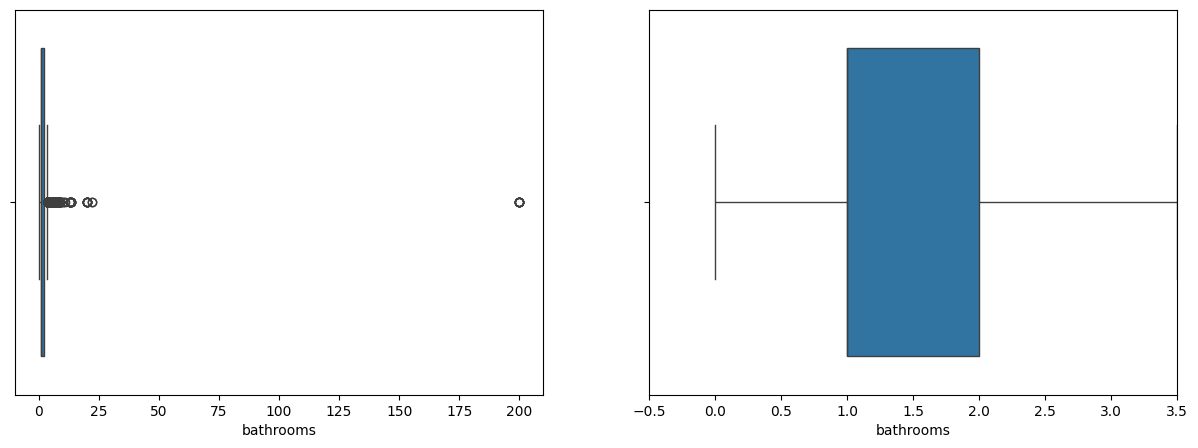

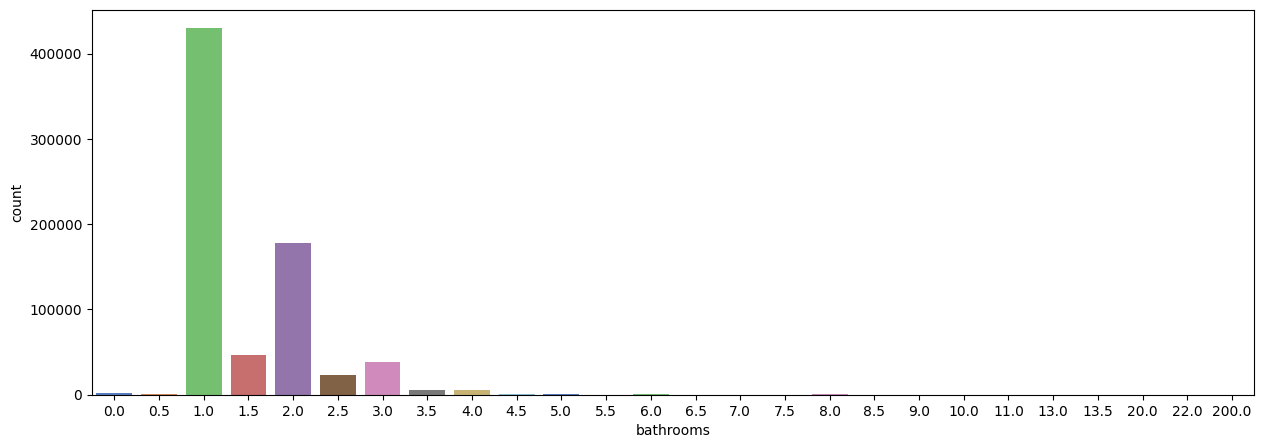

In [18]:
diagrama_caixa(base_airbnb_df['bathrooms'])
#histograma(base_airbnb_df['accommodates'])
#grafico_barra(base_airbnb_df['bathrooms'])
plt.figure(figsize=(15,5))
sns.barplot(x=base_airbnb_df['bathrooms'].value_counts().index, y=base_airbnb_df['bathrooms'].value_counts(),palette='muted', hue= base_airbnb_df['bathrooms'].value_counts().index,legend = False)
#base_airbnb_df, linhas_removidas = excluir_outliers(base_airbnb_df,'bathrooms')
#print('{} linhas removidas'.format(linhas_removidas))
print(limites(base_airbnb_df['bathrooms']))
print(base_airbnb_df['bathrooms'].value_counts)

## bedrooms  

9074 linhas removidas


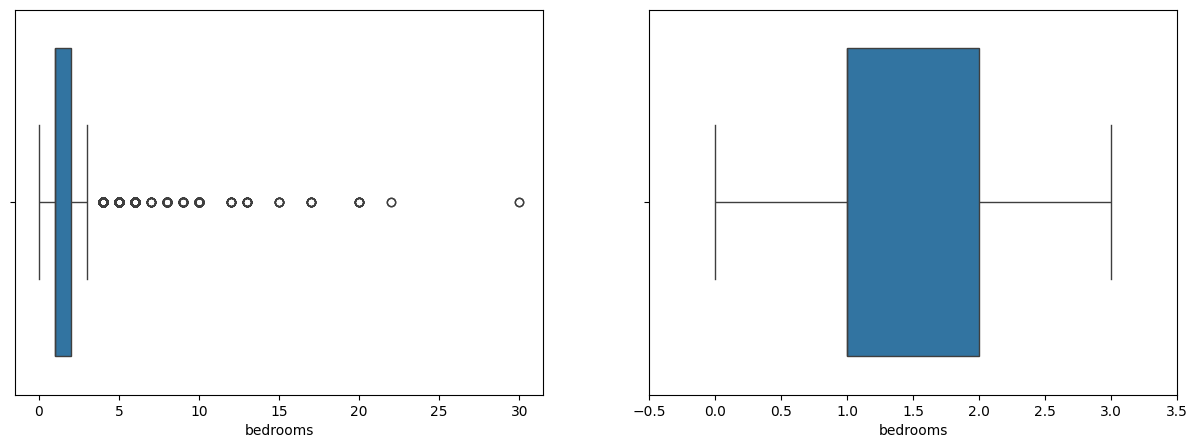

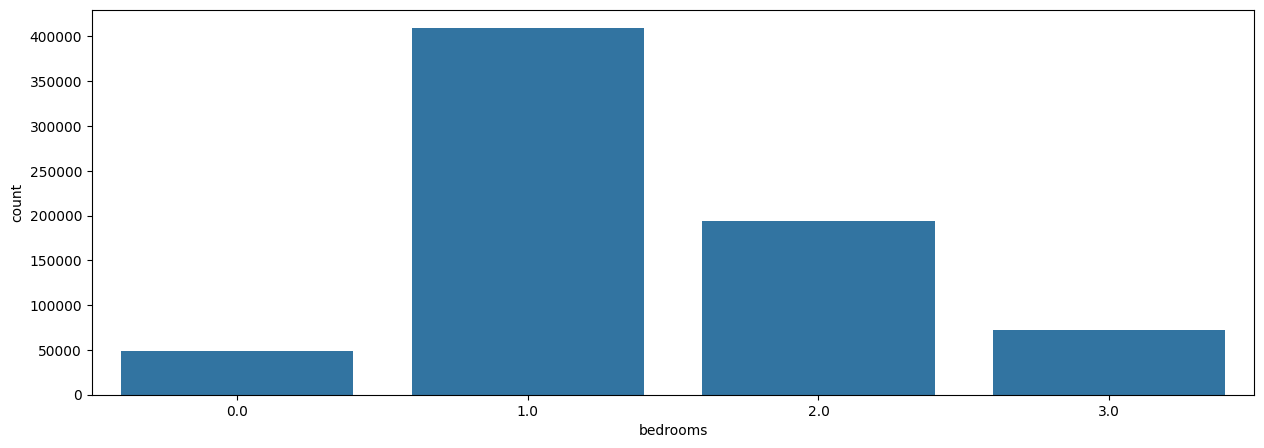

In [19]:
diagrama_caixa(base_airbnb_df['bedrooms'])
#histograma(base_airbnb_df['accommodates'])
grafico_barra(base_airbnb_df['bedrooms'])
base_airbnb_df, linhas_removidas = excluir_outliers(base_airbnb_df,'bedrooms')
print('{} linhas removidas'.format(linhas_removidas))

## Beds 

7750 linhas removidas


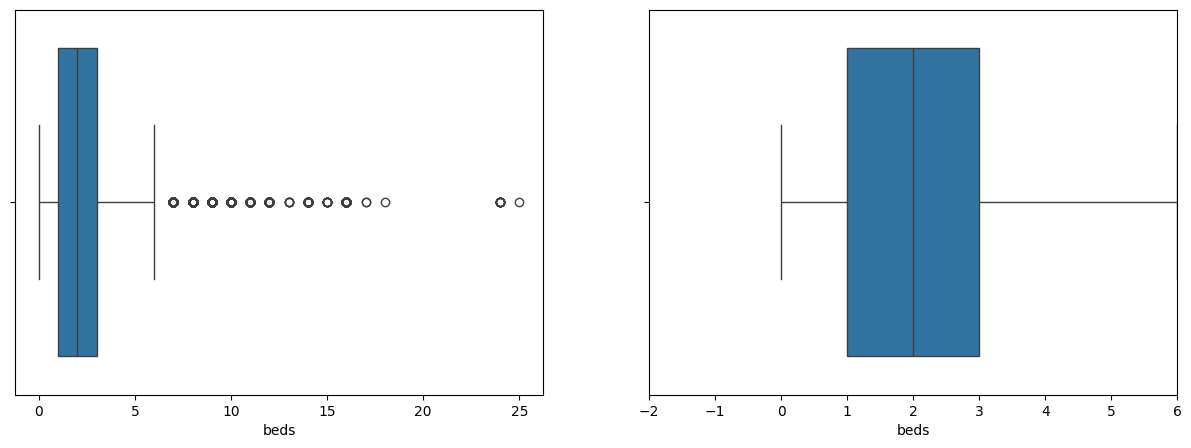

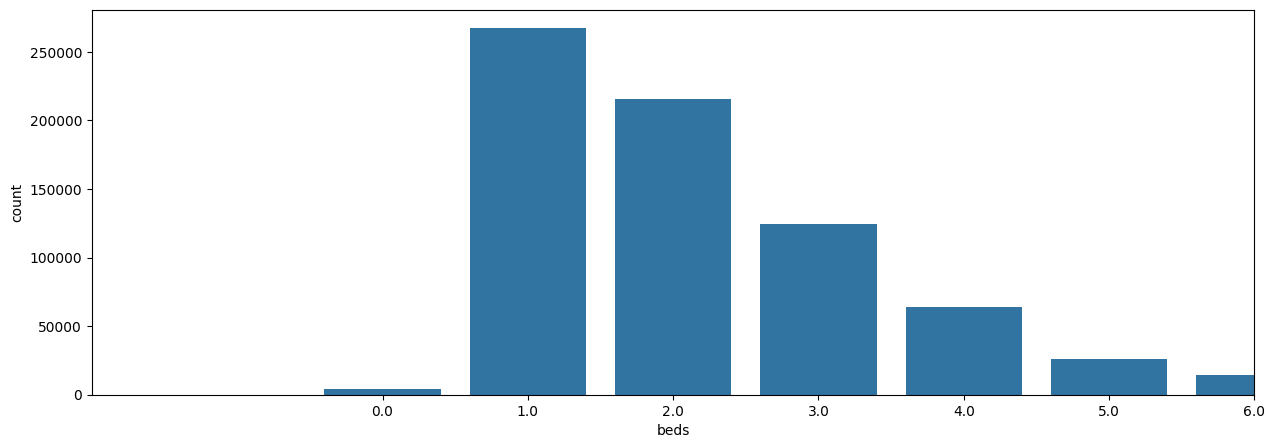

In [20]:
diagrama_caixa(base_airbnb_df['beds'])
grafico_barra(base_airbnb_df['beds'])
base_airbnb_df, linhas_removidas = excluir_outliers(base_airbnb_df,'beds')
print('{} linhas removidas'.format(linhas_removidas))

## Remover guests_included

In [21]:
base_airbnb_df.shape
print(base_airbnb_df.dtypes)

host_is_superhost            object
host_listings_count         float64
latitude                    float64
longitude                   float64
property_type                object
room_type                    object
accommodates                  int64
bathrooms                   float64
bedrooms                    float64
beds                        float64
bed_type                     object
amenities                    object
price                       float32
guests_included               int64
extra_people                float32
minimum_nights                int64
maximum_nights                int64
number_of_reviews             int64
instant_bookable             object
is_business_travel_ready     object
cancellation_policy          object
ano                           int64
mes                           int64
dtype: object


# minimum_nights

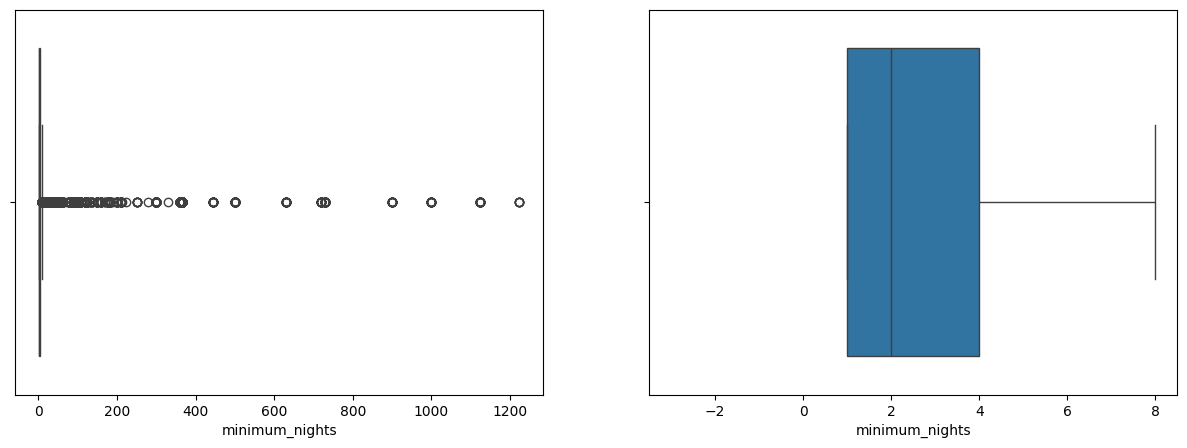

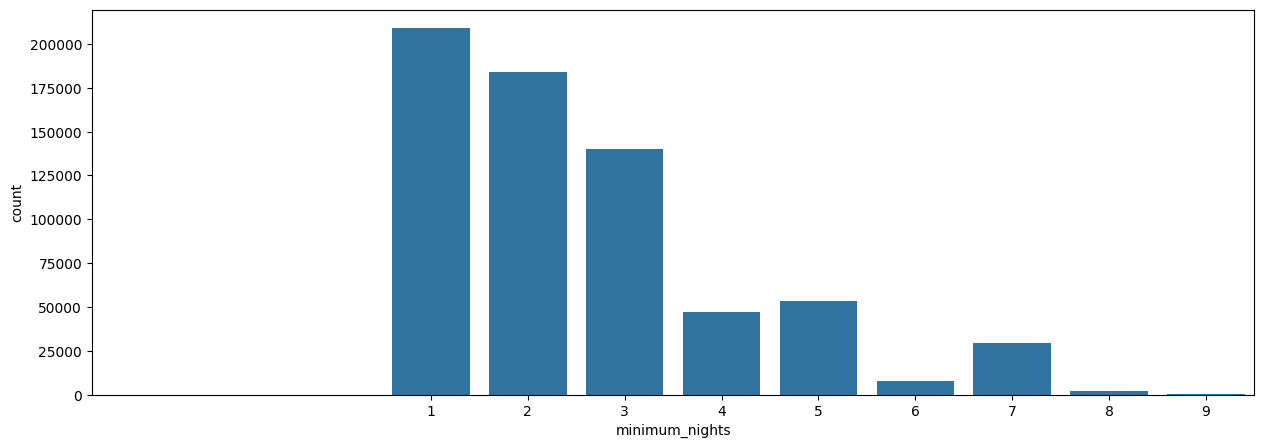

In [22]:
diagrama_caixa(base_airbnb_df['minimum_nights'])

grafico_barra(base_airbnb_df['minimum_nights'])
#base_airbnb_df, linhas_removidas = excluir_outliers(base_airbnb_df,'beds')
#print('{} linhas removidas'.format(linhas_removidas))

# maximum_nights

In [23]:
#diagrama_caixa(base_airbnb_df['maximum_nights'])
#grafico_barra(base_airbnb_df['maximum_nights'])
base_airbnb_df = base_airbnb_df.drop('maximum_nights',axis=1)
base_airbnb_df.shape

(715857, 22)

# number_of_reviews excluido! 

In [24]:
base_airbnb_df = base_airbnb_df.drop('number_of_reviews',axis=1)
base_airbnb_df.shape

(715857, 21)

# Tratamento de Colunas Categóricas

### property_type

property_type
Apartment                 562827
House                      61687
Condominium                32154
Serviced apartment         17868
Loft                       13847
Bed and breakfast           4739
Guest suite                 4325
Hostel                      3791
Guesthouse                  2707
Other                       2655
Villa                       1483
Aparthotel                  1253
Townhouse                   1194
Hotel                       1159
Earth house                  593
Boutique hotel               539
Tiny house                   530
Chalet                       526
Casa particular (Cuba)       342
Cottage                      298
Bungalow                     233
Dorm                         201
Cabin                        141
Castle                       140
Nature lodge                 131
Treehouse                     76
Boat                          68
Island                        54
Hut                           40
Campsite                     

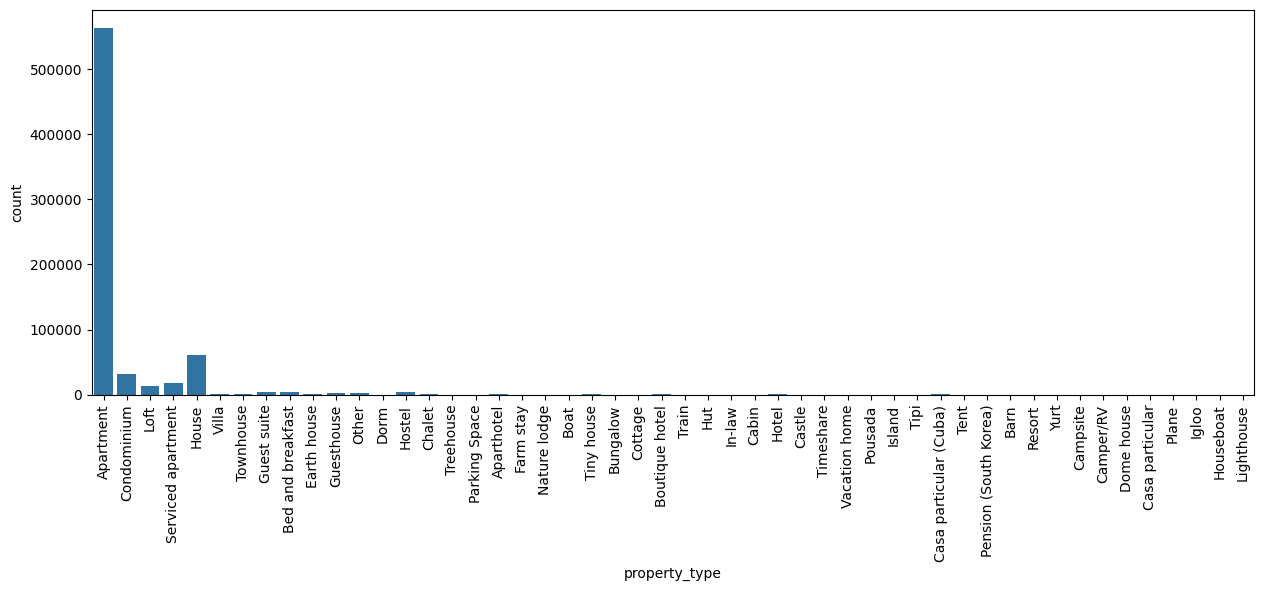

In [25]:
print(base_airbnb_df['property_type'].value_counts())

plt.figure(figsize=(15,5))
grafico = sns.countplot(x=base_airbnb_df['property_type'])
grafico.tick_params(axis='x', rotation=90)

property_type
Apartment             562827
House                  61687
Condominium            32154
Serviced apartment     17868
Loft                   13847
Outros                  9257
Bed and breakfast       4739
Guest suite             4325
Hostel                  3791
Guesthouse              2707
Other                   2655
Name: count, dtype: int64


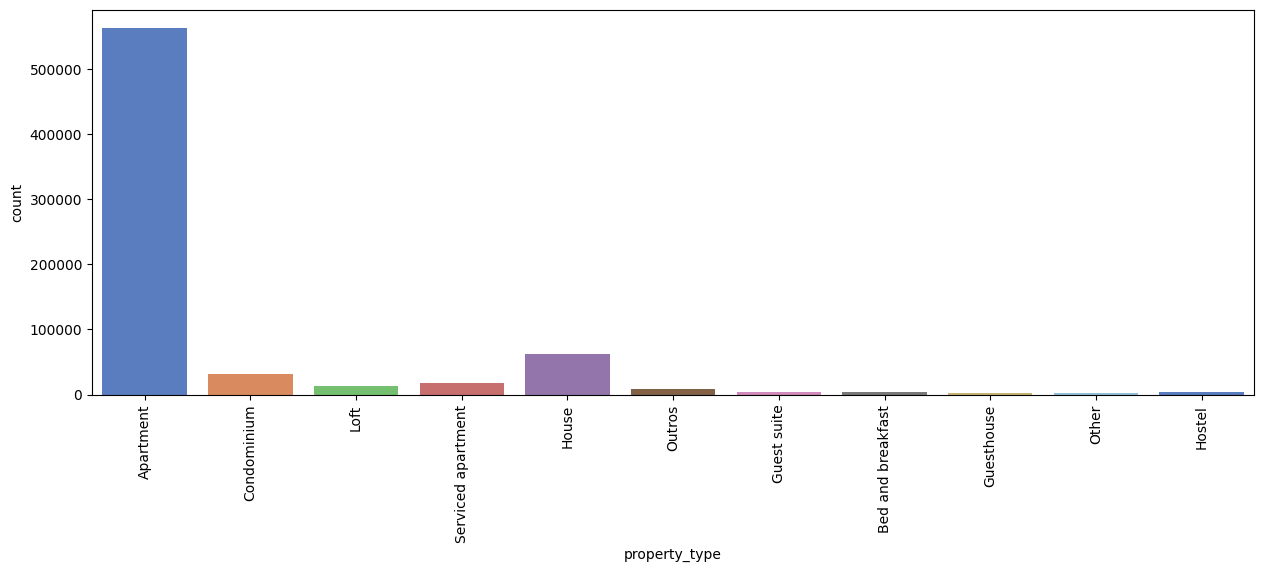

In [26]:
tabela_tipo_casa = base_airbnb_df['property_type'].value_counts()
coluna_agrupar = []

for tipo in tabela_tipo_casa.index:
    if tabela_tipo_casa[tipo] < 2600:
        coluna_agrupar.append(tipo)
#print(coluna_agrupar)

for tipo in coluna_agrupar:
    base_airbnb_df.loc[base_airbnb_df['property_type']==tipo,'property_type'] = 'Outros'

print(base_airbnb_df['property_type'].value_counts())   

plt.figure(figsize=(15,5))
grafico = sns.countplot(x=base_airbnb_df['property_type'],hue=base_airbnb_df['property_type'],legend=False,palette='muted')
grafico.tick_params(axis='x',rotation=90)

## Room_type

room_type
Entire home/apt    479840
Private room       218689
Shared room         15382
Hotel room           1946
Name: count, dtype: int64


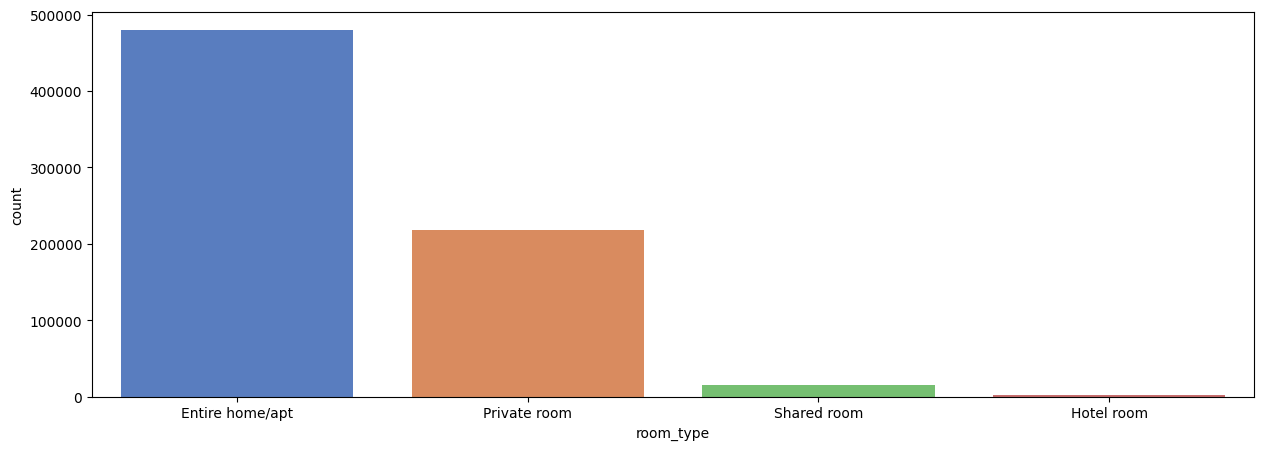

In [27]:
print(base_airbnb_df['room_type'].value_counts())
plt.figure(figsize=(15,5))
sns.countplot(x=base_airbnb_df['room_type'],hue=base_airbnb_df['room_type'],legend=False,palette='muted');

## bed_type

bed_type
Real Bed    703283
Outros       12574
Name: count, dtype: int64


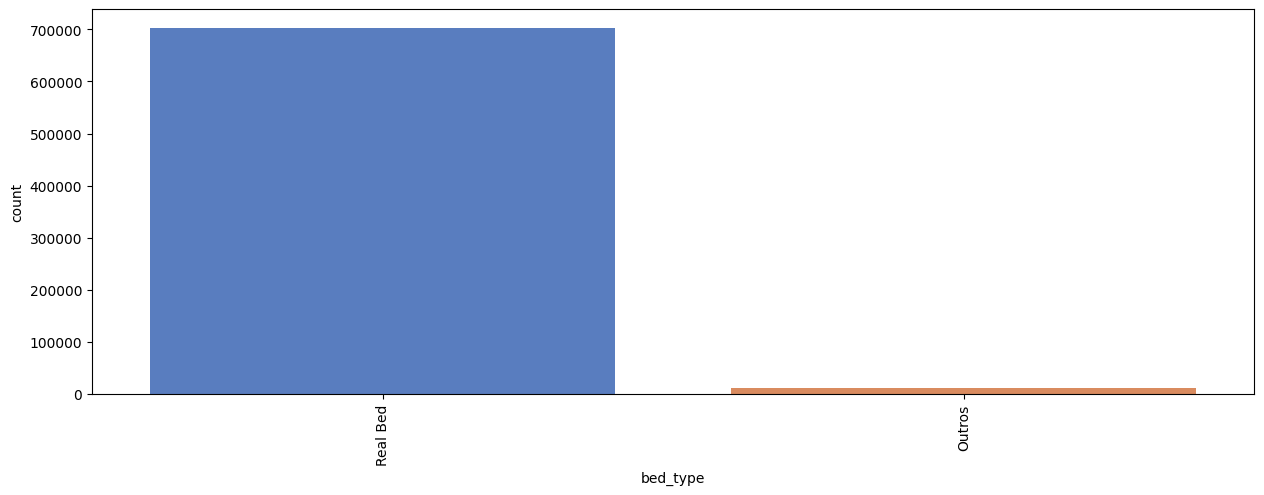

In [28]:
tabela_tipo_camas = base_airbnb_df['bed_type'].value_counts()
coluna_agrupar = []

for tipo in tabela_tipo_camas.index:
    if tabela_tipo_camas[tipo] <= 8700:
        coluna_agrupar.append(tipo)

#print(coluna_agrupar)        
for tipo in coluna_agrupar:
    base_airbnb_df.loc[base_airbnb_df['bed_type']==tipo,'bed_type'] = 'Outros'
print(base_airbnb_df['bed_type'].value_counts())

plt.figure(figsize=(15,5))
grafico = sns.countplot(x=base_airbnb_df['bed_type'],hue=base_airbnb_df['bed_type'], legend=False, palette='muted')
grafico.tick_params(axis='x', rotation=90)



## cancellation_policy

cancellation_policy
flexible                       305726
strict_14_with_grace_period    262331
moderate                       126479
strict                          21321
Name: count, dtype: int64


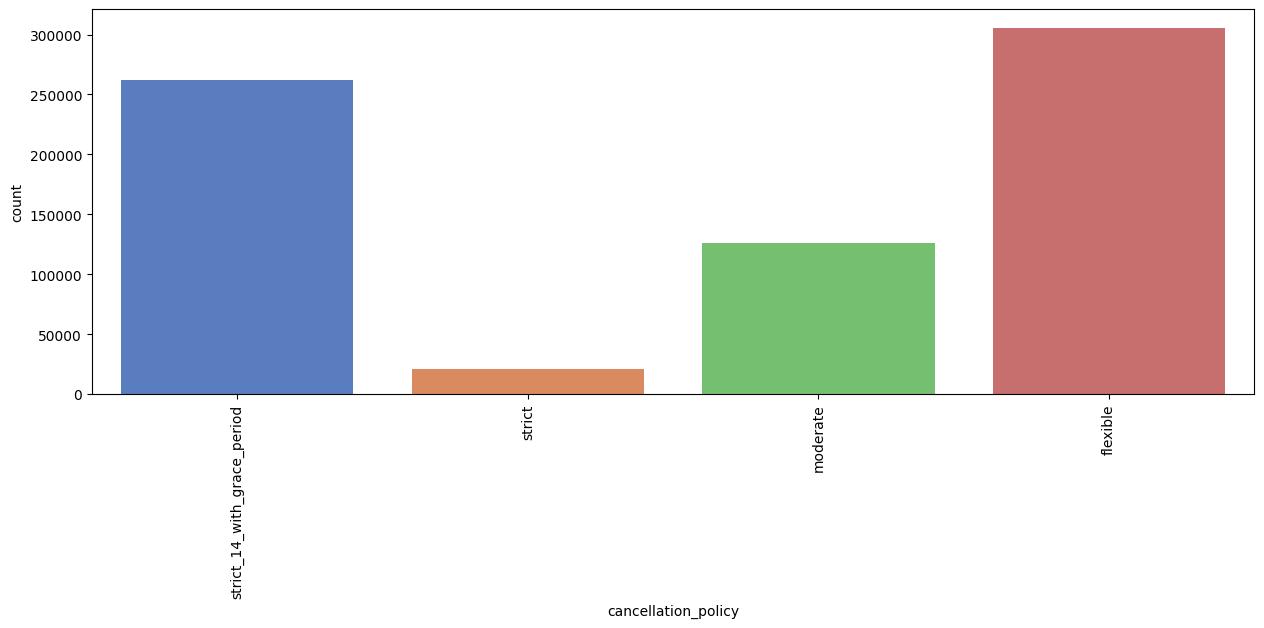

In [29]:
tabela_tipo_cancellation_policy = base_airbnb_df['cancellation_policy'].value_counts()
coluna_agrupar = []

for tipo in tabela_tipo_cancellation_policy.index:
    if tabela_tipo_cancellation_policy[tipo] < 100000:
        coluna_agrupar.append(tipo)
        
#print(coluna_agrupar)
for tipo in coluna_agrupar:
    base_airbnb_df.loc[base_airbnb_df['cancellation_policy']==tipo,'cancellation_policy'] = "strict"

print(base_airbnb_df['cancellation_policy'].value_counts())

plt.figure(figsize=(15,5))
grafico = sns.countplot(x=base_airbnb_df['cancellation_policy'],hue=base_airbnb_df['cancellation_policy'],legend=False,palette='muted')
grafico.tick_params(axis='x',rotation=90)


## amenities

In [30]:
#print(base_airbnb_df['amenities'].iloc[1].split(','))
#print(len(base_airbnb_df['amenities'].iloc[1].split(',')))

base_airbnb_df['n_amenities'] = base_airbnb_df['amenities'].str.split(',').apply(len)
base_airbnb_df = base_airbnb_df.drop('amenities', axis=1)
base_airbnb_df.shape

#diagrama_caixa(base_airbnb_df['n_amenities'])
#print(base_airbnb_df.dtypes())

(715857, 21)

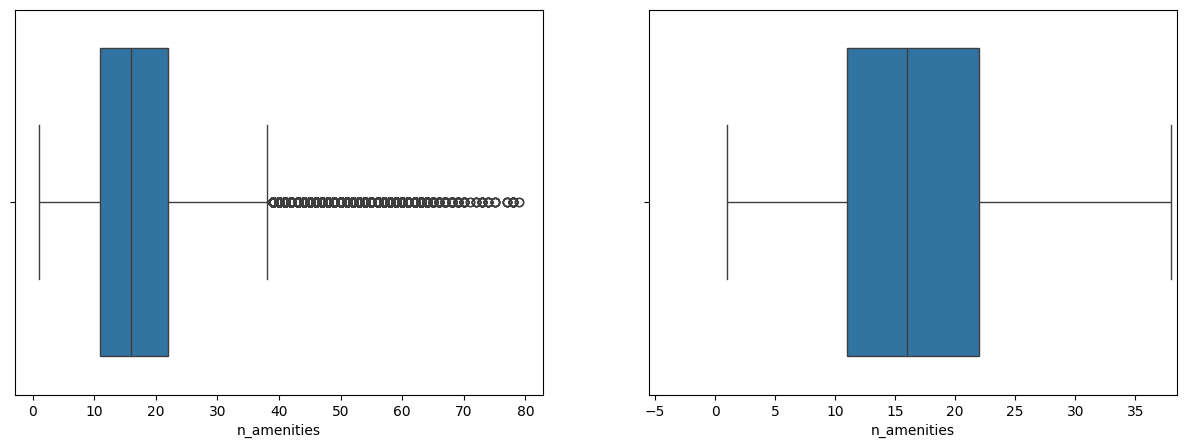

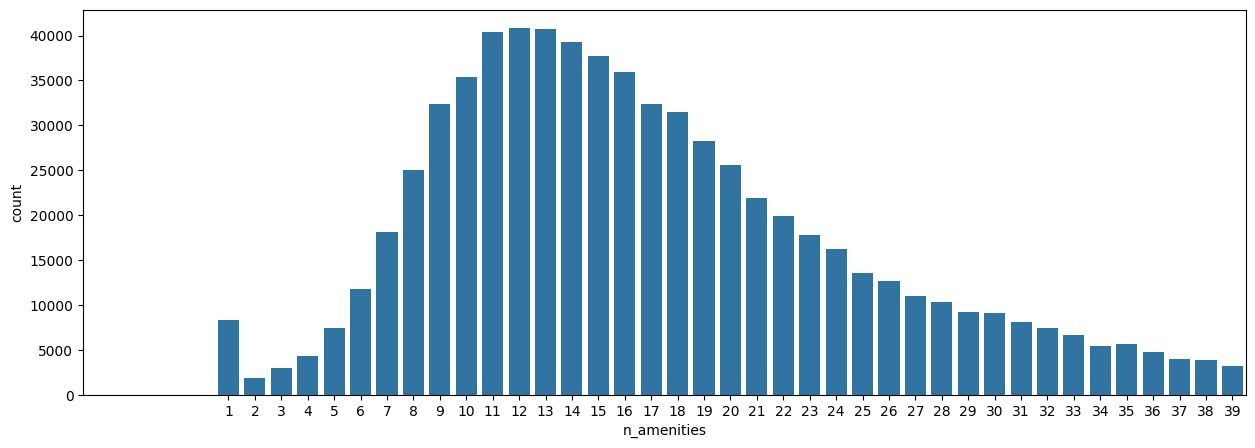

In [31]:
diagrama_caixa(base_airbnb_df['n_amenities'])
grafico_barra(base_airbnb_df['n_amenities'])

In [32]:
base_airbnb_df, linhas_removidas = excluir_outliers(base_airbnb_df,'n_amenities')
print('{} linhas removidas'.format(linhas_removidas))

28611 linhas removidas


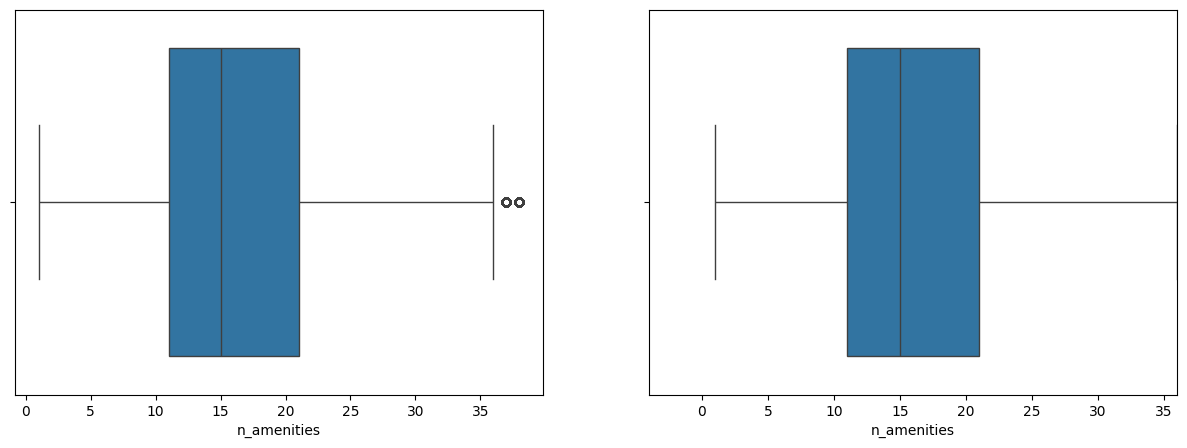

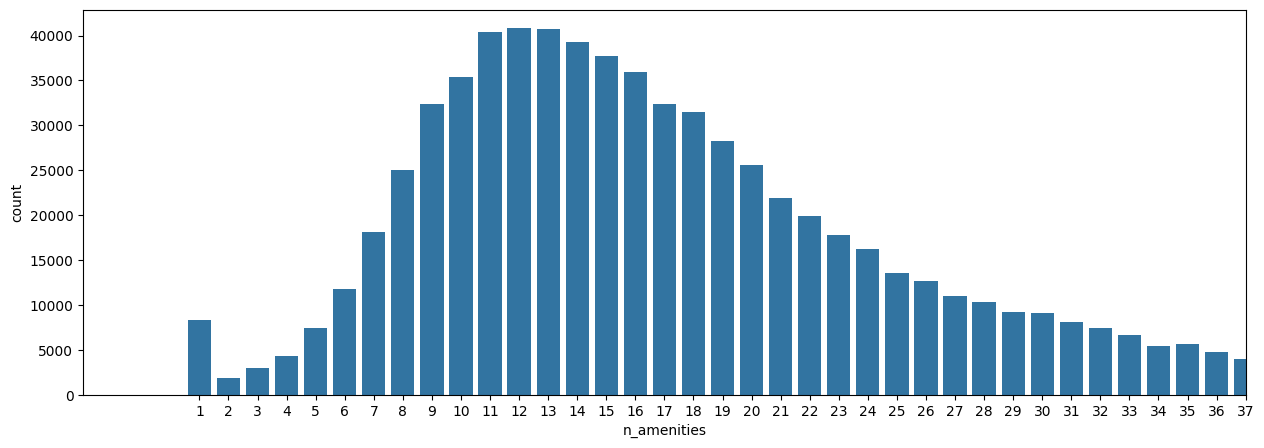

In [33]:
diagrama_caixa(base_airbnb_df['n_amenities'])
grafico_barra(base_airbnb_df['n_amenities'])

# VISUALIZAÇÃO DE MAPA DAS PROPRIEDADES

In [34]:

amostra = base_airbnb_df.sample(n=40000)
centro_mapa = {'lat':amostra.latitude.mean(),'lon':amostra.longitude.mean()}
mapa = px.density_mapbox(amostra, lat='latitude', lon='longitude',z='price',radius=2.5,
                        center=centro_mapa, zoom=10,
                        mapbox_style='open-street-map',)
                        #color_continuous_scale=[
                            #[0.0,'green'],
                            #[0.5,'green'],
                            #[0.511111,'yellow'],
                            #[0.711111,'yellow'],
                            #[0.741112,'red'],
                            #[1,'red']],
                                #opacity=0.5))


mapa.show()


# ENCODING

In [35]:
print(base_airbnb_df.iloc[0])

host_is_superhost                                     f
host_listings_count                                 1.0
latitude                                     -22.946854
longitude                                    -43.182737
property_type                                 Apartment
room_type                               Entire home/apt
accommodates                                          4
bathrooms                                           1.0
bedrooms                                            0.0
beds                                                2.0
bed_type                                       Real Bed
price                                             133.0
guests_included                                       2
extra_people                                       34.0
minimum_nights                                       60
instant_bookable                                      f
is_business_travel_ready                              f
cancellation_policy         strict_14_with_grace

In [51]:
colunas_tf = ['host_is_superhost', 'instant_bookable', 'is_business_travel_ready']
#base_airbnb_cod = pd.get_dummies(data=base_airbnb_df, columns=colunas_tf,dtype=int)
base_airbnb_cod = base_airbnb_df.copy()
for coluna in colunas_tf:
    base_airbnb_cod.loc[base_airbnb_cod[coluna]== 't', coluna] = 1
    base_airbnb_cod.loc[base_airbnb_cod[coluna]== 'f', coluna] = 0
    
display(base_airbnb_cod.head())


host_is_superhost  host_listings_count   latitude  longitude property_type  \
0                 0                  1.0 -22.946854 -43.182737     Apartment   
1                 1                  2.0 -22.965919 -43.178962   Condominium   
3                 0                  3.0 -22.977117 -43.190454     Apartment   
4                 1                  1.0 -22.983024 -43.214270     Apartment   
5                 1                  1.0 -22.988165 -43.193588     Apartment   

         room_type  accommodates  bathrooms  bedrooms  beds  ...  price  \
0  Entire home/apt             4        1.0       0.0   2.0  ...  133.0   
1  Entire home/apt             5        1.0       2.0   2.0  ...  270.0   
3  Entire home/apt             3        1.0       1.0   2.0  ...  161.0   
4  Entire home/apt             3        1.0       1.0   2.0  ...  222.0   
5  Entire home/apt             3        1.5       1.0   2.0  ...  308.0   

   guests_included  extra_people  minimum_nights  instant_bookable  \
0                2          34.0              60                 0   
1                2          51.0               4                 1   
3                2          45.0               4                 0   
4                2          68.0               2                 1   
5                2          86.0               2                 0   

  is_business_travel_ready          cancellation_policy ano  mes  n_amenities  
0                        0  strict_14_with_grace_period   2    4           11  
1                        0                       strict   2    4           25  
3                        0                       strict   2    4           14  
4                        0                       strict   2    4           16  
5                        0                       strict   2    4           30  

[5 rows x 21 columns]

In [52]:
colunas_categorias = ['property_type','room_type','bed_type','cancellation_policy']
base_airbnb_cod = pd.get_dummies(data=base_airbnb_cod,columns=colunas_categorias,dtype=int)
display(base_airbnb_cod.head())



host_is_superhost  host_listings_count   latitude  longitude  accommodates  \
0                 0                  1.0 -22.946854 -43.182737             4   
1                 1                  2.0 -22.965919 -43.178962             5   
3                 0                  3.0 -22.977117 -43.190454             3   
4                 1                  1.0 -22.983024 -43.214270             3   
5                 1                  1.0 -22.988165 -43.193588             3   

   bathrooms  bedrooms  beds  price  guests_included  ...  \
0        1.0       0.0   2.0  133.0                2  ...   
1        1.0       2.0   2.0  270.0                2  ...   
3        1.0       1.0   2.0  161.0                2  ...   
4        1.0       1.0   2.0  222.0                2  ...   
5        1.5       1.0   2.0  308.0                2  ...   

   room_type_Entire home/apt  room_type_Hotel room room_type_Private room  \
0                          1                     0                      0   
1                          1                     0                      0   
3                          1                     0                      0   
4                          1                     0                      0   
5                          1                     0                      0   

  room_type_Shared room  bed_type_Outros  bed_type_Real Bed  \
0                     0                0                  1   
1                     0                0                  1   
3                     0                0                  1   
4                     0                0                  1   
5                     0                0                  1   

   cancellation_policy_flexible  cancellation_policy_moderate  \
0                             0                             0   
1                             0                             0   
3                             0                             0   
4                             0                             0   
5                             0                             0   

   cancellation_policy_strict  cancellation_policy_strict_14_with_grace_period  
0                           0                                                1  
1                           1                                                0  
3                           1                                                0  
4                           1                                                0  
5                           1                                                0  

[5 rows x 38 columns]

In [54]:
print(base_airbnb_cod.iloc[0])

host_is_superhost                                          0
host_listings_count                                      1.0
latitude                                          -22.946854
longitude                                         -43.182737
accommodates                                               4
bathrooms                                                1.0
bedrooms                                                 0.0
beds                                                     2.0
price                                                  133.0
guests_included                                            2
extra_people                                            34.0
minimum_nights                                            60
instant_bookable                                           0
is_business_travel_ready                                   0
ano                                                        2
mes                                                        4
n_amenities             

# Modelo de Previsão

In [55]:
def avaliar_modelo(nome_modelo,y_teste,previsao):
    r2 = r2_score(y_teste,previsao)
    RSME = np.sqrt(mean_squared_error(y_teste,previsao))
    return f'Modelo {nome_modelo}:\nR²:{r2}\nRSME:{RSME}'

In [56]:
modelo_rf = RandomForestRegressor()
modelo_lr = LinearRegression()
modelo_et = ExtraTreesRegressor()
modelos = {'RandomForestRegressor': modelo_rf,
          'LinearRegression': modelo_lr,
          'ExtraTrees': modelo_et,
          }
y= base_airbnb_cod['price']
x=base_airbnb_cod.drop('price', axis=1)

In [57]:
X_train, X_test, y_train, y_test = train_test_split(x,y, random_state=10)

for nome_modelo, modelo in tqdm(modelos.items()):
    #treinar
    modelo.fit(X_train, y_train)
    #testar
    previsao = modelo.predict(X_test)
    print(avaliar_modelo(nome_modelo,y_test,previsao))
    

  0%|          | 0/3 [00:00<?, ?it/s]

Modelo RandomForestRegressor:
R²:0.9668769032534371
RSME:49.912367087578914
Modelo LinearRegression:
R²:0.3312985253220214
RSME:224.26362645808774
Modelo ExtraTrees:
R²:0.9690701419330436
RSME:48.23159939804144


In [61]:
print(modelo_et.feature_importances_)
print(X_train.columns)

[0.01163767 0.05109684 0.09698617 0.10040763 0.06581038 0.04635738
 0.15666002 0.0482057  0.01965428 0.07979605 0.08264708 0.01476044
 0.         0.         0.00633343 0.08057703 0.01087492 0.00109119
 0.00420912 0.00051605 0.00068972 0.00062932 0.00598225 0.00183438
 0.00089611 0.00162959 0.00249798 0.06419526 0.0003192  0.00515235
 0.00151306 0.0022863  0.00224528 0.01469953 0.00991791 0.00170099
 0.00618938]
Index(['host_is_superhost', 'host_listings_count', 'latitude', 'longitude',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'guests_included',
       'extra_people', 'minimum_nights', 'instant_bookable',
       'is_business_travel_ready', 'ano', 'mes', 'n_amenities',
       'property_type_Apartment', 'property_type_Bed and breakfast',
       'property_type_Condominium', 'property_type_Guest suite',
       'property_type_Guesthouse', 'property_type_Hostel',
       'property_type_House', 'property_type_Loft', 'property_type_Other',
       'property_type_Outros', 'property_

0
bedrooms                                         0.156660
longitude                                        0.100408
latitude                                         0.096986
minimum_nights                                   0.082647
n_amenities                                      0.080577
extra_people                                     0.079796
accommodates                                     0.065810
room_type_Entire home/apt                        0.064195
host_listings_count                              0.051097
beds                                             0.048206
bathrooms                                        0.046357
guests_included                                  0.019654
instant_bookable                                 0.014760
cancellation_policy_flexible                     0.014700
host_is_superhost                                0.011638
property_type_Apartment                          0.010875
cancellation_policy_moderate                     0.009918
mes                                              0.006333
cancellation_policy_strict_14_with_grace_period  0.006189
property_type_House                              0.005982
room_type_Private room                           0.005152
property_type_Condominium                        0.004209
property_type_Serviced apartment                 0.002498
bed_type_Outros                                  0.002286
bed_type_Real Bed                                0.002245
property_type_Loft                               0.001834
cancellation_policy_strict                       0.001701
property_type_Outros                             0.001630
room_type_Shared room                            0.001513
property_type_Bed and breakfast                  0.001091
property_type_Other                              0.000896
property_type_Guesthouse                         0.000690
property_type_Hostel                             0.000629
property_type_Guest suite                        0.000516
room_type_Hotel room                             0.000319
is_business_travel_ready                         0.000000
ano                                              0.000000

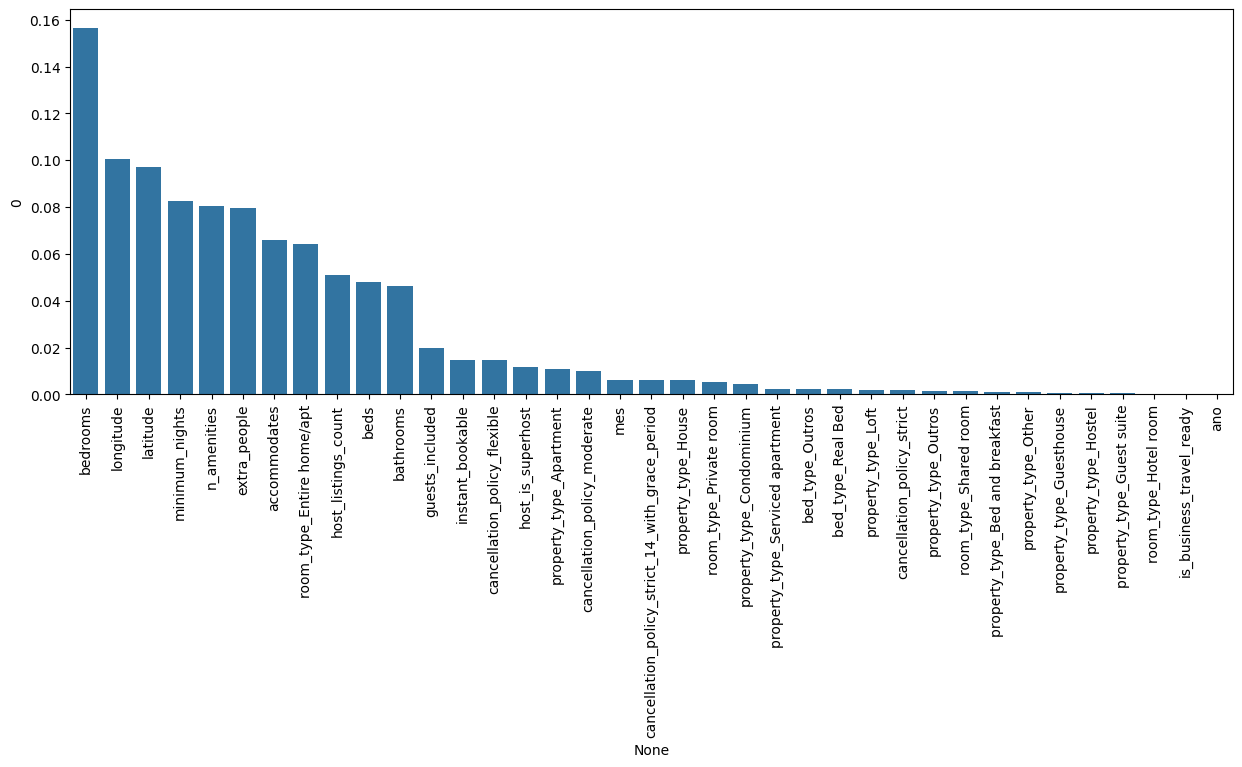

In [69]:
importancia_features = pd.DataFrame(modelo_et.feature_importances_, X_train.columns)
importancia_features = importancia_features.sort_values(by=0,ascending=False)
display(importancia_features)
plt.figure(figsize=(15,5))
ax = sns.barplot(x=importancia_features.index, y=importancia_features[0])
ax.tick_params(axis='x',rotation=90)


In [76]:
#base_airbnb_cod = base_airbnb_cod.drop('is_business_travel_ready',axis=1)

y=base_airbnb_cod['price']
X=base_airbnb_cod.drop('price', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=10)

modelo_et.fit(X_train, y_train)
previsao = modelo_et.predict(X_test)
print(avaliar_modelo('ExtraTrees', y_test, previsao))

Modelo ExtraTrees:
R²:0.9690649044105915
RSME:48.23568288576679


In [77]:
print(previsao)

[  86.22 1200.98  350.04 ...   45.77  551.    206.22]


In [78]:
X['price'] = y
X.to_csv('dados.csv')

In [80]:
import joblib
joblib.dump(modelo_et,'modelo.joblib')

['modelo.joblib']